Loading the latest model: SVM
New data loaded.


/tmp/ipykernel_16535/2148953769.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="husl")


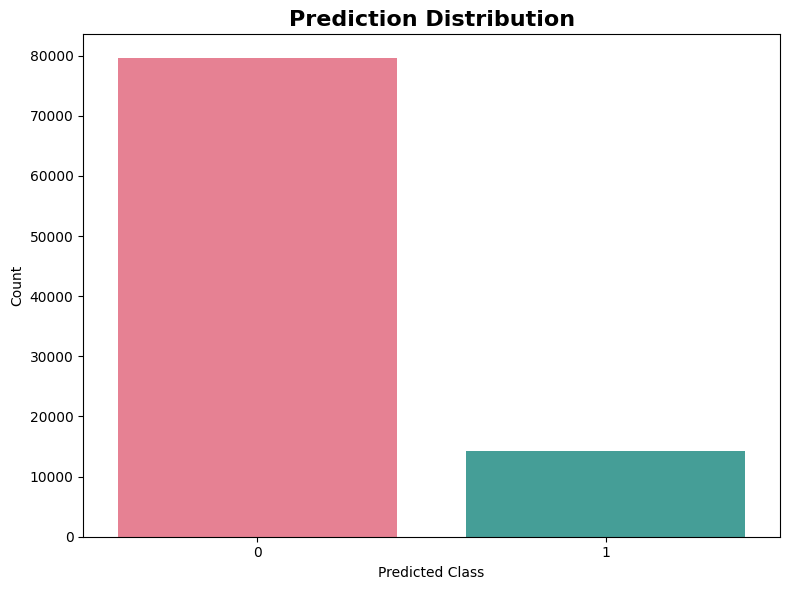

Predictions completed.
[0 0 0 ... 0 0 0]


In [ ]:
import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

registry_file = "../data/model/model_registry.csv"
if not os.path.exists(registry_file):
    raise FileNotFoundError(f"Model registry not found at {registry_file}")

registry_df = pd.read_csv(registry_file)

latest_entry = registry_df.iloc[-1]
model_name = latest_entry["model_name"]
model_path = latest_entry["model_path"]
feature_columns_path = latest_entry["feature_columns_path"]

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}")
if not os.path.exists(feature_columns_path):
    raise FileNotFoundError(f"Feature columns file not found at {feature_columns_path}")

print(f"Loading the latest model: {model_name}")
svm_model = joblib.load(model_path)

feature_columns = joblib.load(feature_columns_path)

new_data = pd.read_csv("../data/raw/test.csv")
print("New data loaded.")

# Preprocess New Data
numeric_cols = new_data.select_dtypes(include=['number']).columns
non_numeric_cols = new_data.select_dtypes(exclude=['number']).columns

new_data[numeric_cols] = new_data[numeric_cols].fillna(new_data[numeric_cols].mean())
for col in non_numeric_cols:
    new_data[col] = new_data[col].fillna(new_data[col].mode()[0])

new_data = pd.get_dummies(new_data, drop_first=True)
missing_cols = set(feature_columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0
new_data = new_data[feature_columns]

scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

predictions = svm_model.predict(new_data_scaled)

plt.figure(figsize=(8, 6))
sns.countplot(x=predictions, palette="husl")
plt.title("Prediction Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("Predictions completed.")
print(predictions)
